In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
RANDOM_SEED = 0

X, y = make_blobs(n_samples=100, centers=[(0, 3), (3, 3), (3, 0)],
                  n_features=2, random_state=RANDOM_SEED,
                  cluster_std=(0.9, 0.9, 0.9))

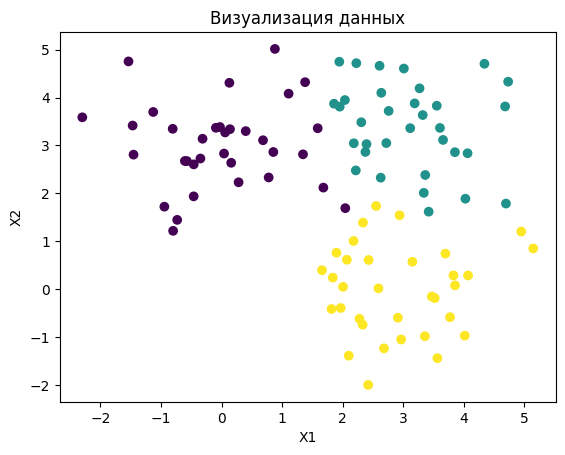

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
depth = 5
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)

clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

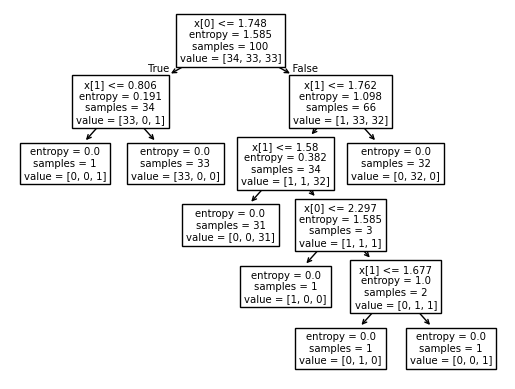

In [5]:
plot_tree(clf_tree)
plt.show()

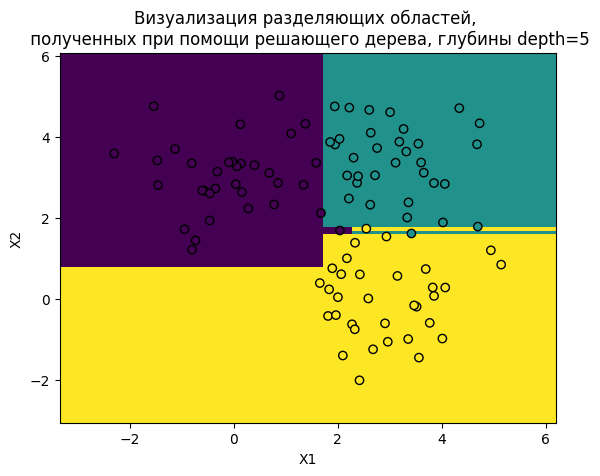

In [6]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title(
    'Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy: {}".format(accuracy_score(y, y_pred)))
print("F1 score: {}".format(f1_score(y, y_pred, average='micro')))

[[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Accuracy: 1.0
F1 score: 1.0


In [8]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape(-1, 1)
y = np.exp(X[:, 0] ** 2) + np.random.normal(0.0, 0.1, X.shape[0])

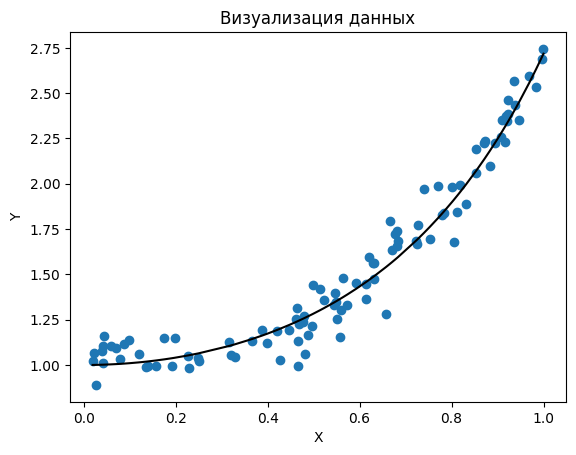

In [9]:
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], np.exp(X[:, 0] ** 2), c='k')

plt.title("Визуализация данных")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor
depth = 2
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

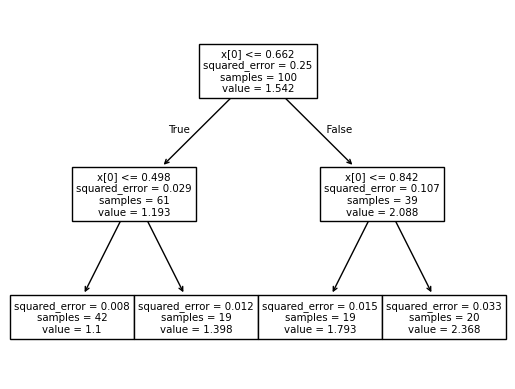

In [11]:
plot_tree(reg_tree)
plt.show()

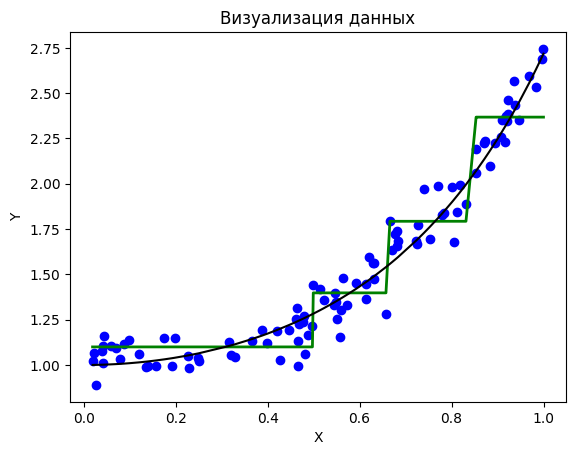

In [12]:
y_pred = reg_tree.predict(X)

plt.scatter(X, y, c='b')
plt.plot(X, y_pred, c='g', lw=2)
plt.plot(X, np.exp(X[:, 0] ** 2), c='k')

plt.title("Визуализация данных")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 = ', r2_score(y, y_pred))
print('MSE = ', mean_squared_error(y, y_pred))

r2 =  0.9390862405346024
MSE =  0.015205865278256793
